In [1]:
import sympy as sym
import numpy as np
sym.init_printing()

import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as ipw 

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
alpha, r, lam, R, v, u, beta, c = sym.symbols('alpha, r, L, R, v, u, beta, c')

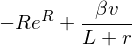

In [3]:
workers =  beta * v / (r + lam) -R* sym.exp(R)
workers

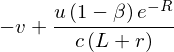

In [10]:
firms = u*sym.exp(-R)*(1-beta)/(c*(r+lam))-v
firms

In [5]:
steadystate = u*v*sym.exp(-R)-lam*(1-u)
steadystate

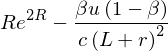

In [6]:
f_w = R*sym.exp(2*R)-u*(1-beta)*beta/(c*(r+lam)**2)
f_w

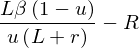

In [7]:
s_w = (1-u)/u*lam*beta/(r+lam)-R
s_w

## try a numerical solution

In [8]:
def ModelSolver(B,L,r_val,c_val):
    try: 
        out = sym.nsolve(((1-u)/u*lam*beta/(r+lam)-R,
                       R*sym.exp(2*R)-u*(1-beta)*beta/(c*(r+lam)**2),
                       lam-L,r-r_val,c-c_val,beta-B),
                      (u,R,lam,c,beta,r),(.1,1,L,c_val,B,r_val))
    except: 
        out = sym.Matrix([float("NaN")]*6)
    return out
def SocialOpt(L,r_val,c_val):
    try: 
        welf_u = (1-u)*(sym.log(u/lam)-sym.log((1-u)*(2*c))/2)
        foc_welf_u = sym.diff(welf_u,u)
    
        s_opt = sym.nsolve((foc_welf_u, lam-L,r-r_val,c-c_val),(u,lam,c,r),(.1,L,c_val,r_val))
        opt_u = s_opt[0]
        opt_R = sym.log(u) -sym.log(1-u)/2 -sym.log(lam) -sym.log(2*c)/2 
    
        opt_welf = welf_u.subs([(u,opt_u),(lam,L),(c,c_val)])
    
        out = [opt_u, opt_R.subs([(u,opt_u),(lam,L),(c,c_val)]).evalf(), welf_u.subs([(u,opt_u),(lam,L),(c,c_val)]).evalf()]
    except:
        out = [float("NaN")]*6
    return out



<IPython.core.display.Javascript object>


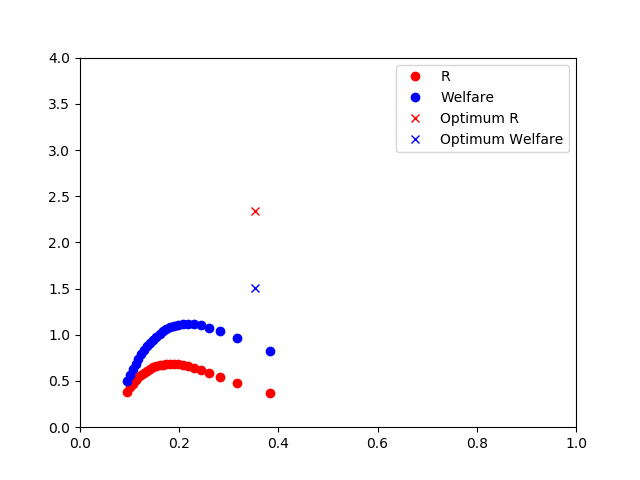

interactive(children=(FloatSlider(value=0.3, description='lam', max=1.0, step=0.05), FloatSlider(value=0.95, d…

In [9]:
#%xmode Verbose
x = np.linspace(0,1,30,endpoint=False)

lam_v =0.3
r_v = .95
c_v = .01

data = [ModelSolver(B, lam_v, r_v, c_v) for B in x]
optimum = SocialOpt(lam_v,r_v,c_v)
    

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
lineR, = ax.plot([res[0] for res in data],
                 [res[1] for res in data],
                 'ro',label='R')

lineWel, = ax.plot([res[0] for res in data],
                  [(res[1] + res[4] )*(1-res[0]) for res in data],
                  'bo',label='Welfare')

dot_optR, = ax.plot([optimum[0]],[optimum[1]],
                  'rx' ,label='Optimum R')
dot_optWelf, = ax.plot([optimum[0]],[optimum[2]],
                  'bx' ,label='Optimum Welfare')

plt.legend()
plt.xlim(0,1)
plt.ylim(0,4)

def update(lam=0.3, r = .95, c = .01):
    data = [ModelSolver(B, lam, r, c) for B in x]
    optimum = SocialOpt(lam,r,c)

    lineR.set_ydata([res[1] for res in data])
    lineR.set_xdata([res[0] for res in data])
    lineWel.set_xdata([res[0] for res in data])
    lineWel.set_ydata([(res[1] + res[4] )*(1-res[0]) for res in data])
    
    dot_optR.set_ydata([optimum[1]])
    dot_optR.set_xdata([optimum[0]])
    
    dot_optWelf.set_ydata([optimum[2]])
    dot_optWelf.set_xdata([optimum[0]])
    
    fig.canvas.draw()
    
ipw.interact(update, lam=(0.0,1.0,.05), r=(0.,1.0,.01), c=(0.0,.1,.001));
